## 1) Data Quality 

### Model 1: DFT error estimation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model

Import the data from data.xlsx

In [2]:
X_y = pd.read_excel('data.xlsx', index_col=None, header=None)

In [3]:
X_y.shape

(1676, 714)

In [4]:
X = X_y.drop([713], axis = 1)
y = X_y[713]
X.shape

(1676, 713)

Split X and Y in training and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1148)

### Create a Ridge regression model (L2 regularization)

In [6]:
model_L2 = linear_model.Ridge(alpha=2)
model_L2.fit(X_train, y_train)
m = model_L2.coef_
m[:100]

array([ -4.89839265,   7.60554428, -10.15527688,  -6.30229992,
        -5.25901231,  -7.73696505,  -0.17632795,  -1.95882537,
         0.68631834,  -2.47273955,   6.18924871,   3.2626179 ,
        -1.0883714 ,   1.48669591,  -1.18940209,  -0.40543531,
         0.27851357,  -0.07514877,  -2.57349829,   5.42227885,
         2.39089493,   7.24409956,   1.41135857,   4.20499975,
        -3.13622693,   0.19714236,  -0.35262795,  -0.40580891,
         0.16231566,   1.10849   ,  -3.00562971,  -1.82426671,
         1.06734488,   1.0201865 ,   1.28319069,  -0.0619229 ,
         0.35973855,   1.23908722,   0.50182311,   2.42045022,
        -1.68463135,  -1.68463135,  -2.14624028,   0.24443674,
         2.03076256,   0.66004746,  -3.4422431 ,   6.19566353,
        -3.24811689,  -1.87605917,   0.23437413,  -0.88288532,
         2.68019315,   2.37368825,   0.53529399,   0.03783596,
        -0.55047274,  -1.6384824 ,  -1.91731011,  -1.35124042,
        -5.82305473,  -3.98440977,   6.38295148,   1.10

In [7]:
m.size

713

In [8]:
cnt = []
for column_name in X_train.columns:
    column = X_train[column_name]
    cnt.append(np.count_nonzero(column) / column.size * 100)    

In [9]:
cnt = np.array(cnt)
cnt[:100]

array([51.67064439, 95.34606205,  6.32458234, 50.95465394, 82.33890215,
        6.08591885, 39.85680191, 36.1575179 , 45.70405728,  1.43198091,
       32.10023866,  4.65393795,  0.59665871, 27.32696897, 36.27684964,
       35.08353222,  1.07398568, 29.71360382,  0.71599045,  5.84725537,
        3.69928401, 19.57040573,  3.93794749,  3.1026253 ,  2.38663484,
       16.34844869,  9.66587112,  3.34128878,  2.50596659,  2.14797136,
        2.14797136,  1.90930788,  8.59188544,  7.99522673,  9.30787589,
        2.2673031 ,  2.14797136,  1.90930788,  2.50596659,  1.67064439,
        1.78997613,  1.78997613,  1.90930788,  8.35322196,  7.15990453,
        7.99522673,  9.06921241, 33.77088305,  9.66587112, 32.10023866,
        8.71121718,  8.94988067, 12.64916468,  7.39856802,  8.35322196,
        7.6372315 , 11.81384248, 18.01909308, 64.6778043 , 21.24105012,
       17.18377088,  8.71121718, 34.12887828, 12.76849642, 11.69451074,
       10.14319809,  4.05727924,  3.46062053, 24.34367542, 11.69

In [10]:
cnt.size

713

Plot Feature importance vs Completeness 

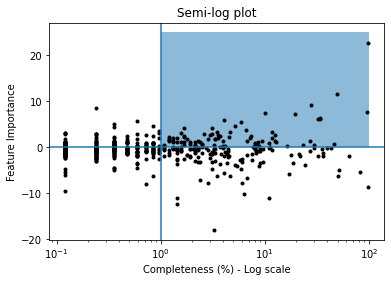

In [11]:
plt.plot(cnt, m, '.', color='black')
plt.xscale("log")
plt.xlabel("Completeness (%) - Log scale")
plt.ylabel("Feature Importance")
plt.title("Semi-log plot")
plt.axvline(x=1)
plt.axhline(y=0)
x=[1,100,100,1]
y=[0,0,25,25]
plt.fill(x, y, alpha=0.5)

**The area shaded in blue is our area of interest**

From the above graph we can infer that there is a strong correlation between feature importance and completeness.<br>
Almost every feature with completeness less than 1% has very low feature importance value.<br>
Features with completeness greater than 1% contribute at higher value of feature importance.<br>
Negative feature importance value means that feature makes the loss go up. We can neglect the features having negative values, since the model is not getting good use of these features.<br>
Similarly, features having a completness of less than 1% can be neglected and this helps in reducing the computing power of the model.

**What can be done to improve the correlation?**

Fine tuning the hyper parameters using a grid search technique further brings down the coefficients values to zero.<br>
This also reduces the non zero coefficients and a better plot or correlation could be established<br>